In [1]:
import pandas as pd

In [2]:
path = 'C:/Users/trmyi/Desktop/AI_class/project/house_prediction/'
#https://data.gov.tw/dataset/137371 READ DESCRIPTIONS OF COLUMNS
df = pd.read_csv(path+'新北歷年不動產實價登錄資訊-買賣案件-109年.csv')

C:\Users\trmyi\AppData\Local\Temp\ipykernel_22224\968713635.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'新北歷年不動產實價登錄資訊-買賣案件-109年.csv')


In [3]:
df.shape

(62999, 32)

In [4]:
df.head(2)

,district,rps01,rps02,rps03,rps04,rps05,rps06,rps07,rps08,rps09,...,rps22,rps23,rps24,rps25,rps26,rps27,rps28,rps29,rps30,rps31
0,板橋區,房地(土地+建物)+車位,新北市板橋區長江路二段31~60號,7.15,住,NaN,NaN,1080904.0,土地1建物1車位1,二十一層,...,108655.0,坡道機械,16.23,0.0,NaN,RPQQMLMKJIOFFAF97CA,NaN,NaN,NaN,NaN
1,板橋區,房地(土地+建物),新北市板橋區縣民大道三段181~210號,9.70,住,NaN,NaN,1081020.0,土地1建物1車位0,二層,...,134190.0,NaN,0.00,0.0,含增建或未登記建物。,RPRQMLMKJIOFFAF08CA,NaN,NaN,NaN,NaN


In [5]:
import re

description = 'district(鄉鎮市區)、rps01(交易標的)、rps02(土地區段位置建物區段門牌)、rps03(土地移轉總面積平方公尺)、rps04(都市土地使用分區)、rps05(非都市土地使用分區)、rps06(非都市土地使用編定)、rps07(交易年月日)、rps08(交易筆棟數)、rps09(移轉層次)、rps10(總樓層數)、rps11(建物型態)、rps12(主要用途)、rps13(主要建材)、rps14(建築完成年月)、rps15(建物移轉總面積平方公尺)、rps16(建物現況格局-房)、rps17(建物現況格局-廳)、rps18(建物現況格局-衛)、rps19(建物現況格局-隔間)、rps20(有無管理組織)、rps21(總價元)、rps22(單價元平方公尺)、rps23(車位類別)、rps24(車位移轉總面積平方公尺)、rps25(車位總價元)、rps26(備註)、rps27(編號)、rps28(主建物面積)、rps29(附屬建物面積)、rps30(陽台面積)、rps31(電梯)'
d_split = description.split('、')

d_list = []

for i in d_split:
    d_list.append(re.search(r'\((.*?)\)',i).group(1))
    
des1 = list(df.columns)

df1 = df.rename(columns={i:j for i,j in zip(des1,d_list)})

In [6]:
df1.columns

Index(['鄉鎮市區', '交易標的', '土地區段位置建物區段門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元',
       '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯'],
      dtype='object')

In [7]:
col_to_delete_1 = ['土地區段位置建物區段門牌','交易年月日','移轉層次','總樓層數','建築完成年月','建物現況格局-隔間','備註','編號','電梯']

In [8]:
df2 = df1.drop(columns=col_to_delete_1)
len(df2.columns)

23

In [9]:
df2.columns

Index(['鄉鎮市區', '交易標的', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定',
       '交易筆棟數', '建物型態', '主要用途', '主要建材', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳',
       '建物現況格局-衛', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元',
       '主建物面積', '附屬建物面積', '陽台面積'],
      dtype='object')

In [10]:
des2 = list(df2.columns)
eng_des = ['District','Product_type','L_area','CityLandUsageType','NonCityLandUsageType',
             'NonCityLandUsage編定','PropertiesIncluded','PropertyType','MainUsage','MainMaterial',
            'B_area','Rooms','LivingR','BathR', 'Management','Price','PricePerArea?','ParkingType',
           'ParkingArea','ParkingAreaPrice','MainB_Area','SideB_Area','BalconyArea']
len(eng_des)

23

In [11]:
df3 = df2.rename(columns={i:j for i,j in zip(des2,eng_des)})

In [12]:
df3.head(2)

,District,Product_type,L_area,CityLandUsageType,NonCityLandUsageType,NonCityLandUsage編定,PropertiesIncluded,PropertyType,MainUsage,MainMaterial,...,BathR,Management,Price,PricePerArea?,ParkingType,ParkingArea,ParkingAreaPrice,MainB_Area,SideB_Area,BalconyArea
0,板橋區,房地(土地+建物)+車位,7.15,住,NaN,NaN,土地1建物1車位1,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,...,2.0,有,14600000.0,108655.0,坡道機械,16.23,0.0,NaN,NaN,NaN
1,板橋區,房地(土地+建物),9.70,住,NaN,NaN,土地1建物1車位0,華廈(10層含以下有電梯),見其他登記事項,鋼筋混凝土造,...,1.0,有,7100000.0,134190.0,NaN,0.00,0.0,NaN,NaN,NaN


In [13]:
#location_stats = df5['location'].value_counts(ascending=False)
district_stats = df3.District.value_counts(ascending=False)
district_stats

新莊區    6968
板橋區    6333
淡水區    5665
中和區    5306
新店區    4801
汐止區    4787
三重區    4735
林口區    4183
土城區    3467
永和區    2783
蘆洲區    2200
三峽區    2067
鶯歌區    2060
五股區    1883
樹林區    1878
泰山區    1143
八里區     697
三芝區     453
深坑區     345
瑞芳區     280
金山區     274
萬里區     241
雙溪區     107
貢寮區      95
平溪區      66
石碇區      66
石門區      60
坪林區      37
烏來區      19
Name: District, dtype: int64

In [14]:
df3.Product_type.value_counts()

房地(土地+建物)+車位    27932
房地(土地+建物)       25739
土地               7158
車位               1960
建物                210
Name: Product_type, dtype: int64

In [15]:
df4 = df3[~((df3['Product_type'] == '車位') | (df3['Product_type'] == '土地'))]

In [16]:
df4.Product_type.value_counts()

房地(土地+建物)+車位    27932
房地(土地+建物)       25739
建物                210
Name: Product_type, dtype: int64

In [17]:
df4.columns

Index(['District', 'Product_type', 'L_area', 'CityLandUsageType',
       'NonCityLandUsageType', 'NonCityLandUsage編定', 'PropertiesIncluded',
       'PropertyType', 'MainUsage', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'PricePerArea?',
       'ParkingType', 'ParkingArea', 'ParkingAreaPrice', 'MainB_Area',
       'SideB_Area', 'BalconyArea'],
      dtype='object')

In [18]:
df4['MainUsage'].value_counts()

住家用        29034
見其他登記事項    22868
商業用          875
工業用          566
住商用          254
工商用          148
見使用執照         53
住工用           40
農舍            12
國民住宅           4
Name: MainUsage, dtype: int64

In [19]:
df5 = df4[df4['MainUsage'] == '住家用']

In [20]:
df5['CityLandUsageType'].unique()

array(['住', '其他', '商', nan, '工', '農', '都市：其他:住宅區', '都市：其他:第一種住宅區',
       '都市：其他:第二種住宅區', '都市：其他:第五種住宅區', '都市：其他:保護區', '都市：其他:第三種住宅區。',
       '都市：其他:第四種住宅區', '都市：其他:商業區', '都市：其他:商業區(一)', '都市：其他:商業區(二)',
       '都市：其他:農業區', '都市：其他:第五之一種住宅區', '都市：其他:道路用地', '都市：其他:公園、綠地',
       '都市：其他:休閒遊憩區', '都市：其他:住宅區(四)', '都市：其他:第三之一種中心商業區', '都市：其他:住宅區(三)',
       '都市：其他:捷運系統用地', '都市：其他:市場用地', '都市：其他:溝渠用地', '都市：其他:中心商業區',
       '都市：其他:人行步道', '都市：其他:風景區', '都市：其他:第二種商業區', '都市：其他:已開發建築密集地區',
       '都市：其他:住宅區(再)', '都市：其他:乙種工業區', '都市：其他:綠地', '都市：其他:歷史風貌特定專用區',
       '都市：其他:住宅區(一)', '都市：其他:第一種商業區', '非都市： ; 非都市編定：', '都市：其他:第二種特定專用區',
       '都市：其他:機關用地', '都市：其他:第六種住宅區', '都市：其他:公園用地', '都市：其他:住宅區(二)',
       '都市：其他:保安保護區', '都市：其他:住宅區(附)', '都市：其他:第四種商業區', '都市：住', '都市：其他:道路',
       '都市：其他:建成商業區', '都市：其他:河川區', '都市：其他:景觀商業區', '都市：其他:人行步道用地',
       '非都市：山坡地保育區 ; 非都市編定：丙種建築用地', '都市：其他:高速公路用地', '都市：其他:零售市場用地',
       '都市：其他:產業專用區', '都市：其他:住宅區(四之一)', '都市：其他:學校用地', '都市：其他:鄰里商業區',
       '都市：其他:部分住宅區部分道路用地', '都市：其

In [21]:
df5['CityLandUsageType'].isna().value_counts()

False    27117
True      1917
Name: CityLandUsageType, dtype: int64

In [22]:
df5['CityLandUsageType'].info()

<class 'pandas.core.series.Series'>
Int64Index: 29034 entries, 0 to 62997
Series name: CityLandUsageType
Non-Null Count  Dtype 
--------------  ----- 
27117 non-null  object
dtypes: object(1)
memory usage: 453.7+ KB


In [23]:
t = '都市：其他:兒童遊樂場用地'

if '住' in t:
    print('住') 
else:
    print('木有')

木有


In [24]:
dft = df5.copy()
dft['CityLandUsageType'] = dft['CityLandUsageType'].apply(lambda x: str(x))

In [25]:
dft['CityLandUsageType'] = dft['CityLandUsageType'].apply(lambda x: '住' if '住' in x else 'other')

In [26]:
dft['CityLandUsageType'].value_counts()

住        18886
other    10148
Name: CityLandUsageType, dtype: int64

In [27]:
df5['CityLandUsageType'] = df5['CityLandUsageType'].apply(lambda x: str(x))
df5['CityLandUsageType'] = df5['CityLandUsageType'].apply(lambda x: '住' if '住' in x else 'other')

C:\Users\trmyi\AppData\Local\Temp\ipykernel_22224\3964206384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['CityLandUsageType'] = df5['CityLandUsageType'].apply(lambda x: str(x))
C:\Users\trmyi\AppData\Local\Temp\ipykernel_22224\3964206384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['CityLandUsageType'] = df5['CityLandUsageType'].apply(lambda x: '住' if '住' in x else 'other')


In [28]:
df5['CityLandUsageType'].value_counts()

住        18886
other    10148
Name: CityLandUsageType, dtype: int64

In [29]:
df6 = df5[df5['CityLandUsageType'] == '住']

In [30]:
df6.columns

Index(['District', 'Product_type', 'L_area', 'CityLandUsageType',
       'NonCityLandUsageType', 'NonCityLandUsage編定', 'PropertiesIncluded',
       'PropertyType', 'MainUsage', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'PricePerArea?',
       'ParkingType', 'ParkingArea', 'ParkingAreaPrice', 'MainB_Area',
       'SideB_Area', 'BalconyArea'],
      dtype='object')

In [31]:
df6['PropertyType'].value_counts()

住宅大樓(11層含以上有電梯)    7783
公寓(5樓含以下無電梯)       6775
華廈(10層含以下有電梯)      2910
套房(1房1廳1衛)          846
透天厝                 514
店面(店鋪)               48
其他                    4
辦公商業大樓                3
工廠                    2
倉庫                    1
Name: PropertyType, dtype: int64

In [32]:
df6['PropertyType'] = df6['PropertyType'].apply(lambda x: x.split('(')[0])

C:\Users\trmyi\AppData\Local\Temp\ipykernel_22224\1562766474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['PropertyType'] = df6['PropertyType'].apply(lambda x: x.split('(')[0])


In [33]:
df6['PropertyType'].value_counts()

住宅大樓      7783
公寓        6775
華廈        2910
套房         846
透天厝        514
店面          48
其他           4
辦公商業大樓       3
工廠           2
倉庫           1
Name: PropertyType, dtype: int64

In [34]:
 df6['PropertyType'] = df6['PropertyType'].apply(lambda x: 'other' if x in ['店面','其他','辦公商業大樓','工廠','倉庫'] else x)

C:\Users\trmyi\AppData\Local\Temp\ipykernel_22224\2106719230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['PropertyType'] = df6['PropertyType'].apply(lambda x: 'other' if x in ['店面','其他','辦公商業大樓','工廠','倉庫'] else x)


In [35]:
 df7 = df6[~(df6['PropertyType'] == 'other')]

In [36]:
df7['PropertyType'].value_counts()

住宅大樓    7783
公寓      6775
華廈      2910
套房       846
透天厝      514
Name: PropertyType, dtype: int64

In [37]:
df7.columns

Index(['District', 'Product_type', 'L_area', 'CityLandUsageType',
       'NonCityLandUsageType', 'NonCityLandUsage編定', 'PropertiesIncluded',
       'PropertyType', 'MainUsage', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'PricePerArea?',
       'ParkingType', 'ParkingArea', 'ParkingAreaPrice', 'MainB_Area',
       'SideB_Area', 'BalconyArea'],
      dtype='object')

In [38]:
df7['MainMaterial'].value_counts()

鋼筋混凝土造       16739
加強磚造          1365
鋼骨鋼筋混凝土造       388
見其他登記事項        268
鋼骨混凝土造          53
磚造              10
鋼筋混凝土加強磚造        2
土造               1
土磚石混合造           1
預力混凝土造           1
Name: MainMaterial, dtype: int64

In [39]:
materials_under_10 = df7['MainMaterial'].value_counts()[df7['MainMaterial'].value_counts()<10]

In [40]:
df7['MainMaterial'] = df7['MainMaterial'].apply(lambda x: 'other' if x in materials_under_10 else x)

C:\Users\trmyi\AppData\Local\Temp\ipykernel_22224\972740512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['MainMaterial'] = df7['MainMaterial'].apply(lambda x: 'other' if x in materials_under_10 else x)


In [41]:
df7['MainMaterial'].value_counts()

鋼筋混凝土造      16739
加強磚造         1365
鋼骨鋼筋混凝土造      388
見其他登記事項       268
鋼骨混凝土造         53
磚造             10
other           5
Name: MainMaterial, dtype: int64

In [42]:
 df8 = df7.drop(df7[df7['MainMaterial'] == 'other'].index)

In [43]:
df8.columns

Index(['District', 'Product_type', 'L_area', 'CityLandUsageType',
       'NonCityLandUsageType', 'NonCityLandUsage編定', 'PropertiesIncluded',
       'PropertyType', 'MainUsage', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'PricePerArea?',
       'ParkingType', 'ParkingArea', 'ParkingAreaPrice', 'MainB_Area',
       'SideB_Area', 'BalconyArea'],
      dtype='object')

In [44]:
df8['Management'].value_counts()

有    11207
無     7616
Name: Management, dtype: int64

In [45]:
df8['Management'] = df8["Management"].replace({"有": 1 ,"無": 0})

In [46]:
df8['Management'].value_counts()

1    11207
0     7616
Name: Management, dtype: int64

In [47]:
df8.head()

,District,Product_type,L_area,CityLandUsageType,NonCityLandUsageType,NonCityLandUsage編定,PropertiesIncluded,PropertyType,MainUsage,MainMaterial,...,BathR,Management,Price,PricePerArea?,ParkingType,ParkingArea,ParkingAreaPrice,MainB_Area,SideB_Area,BalconyArea
0,板橋區,房地(土地+建物)+車位,7.15,住,NaN,NaN,土地1建物1車位1,住宅大樓,住家用,鋼筋混凝土造,...,2.0,1,14600000.0,108655.0,坡道機械,16.23,0.0,NaN,NaN,NaN
2,板橋區,房地(土地+建物),28.85,住,NaN,NaN,土地1建物1車位0,住宅大樓,住家用,鋼筋混凝土造,...,2.0,1,19500000.0,125289.0,NaN,0.00,0.0,NaN,NaN,NaN
3,板橋區,房地(土地+建物),17.25,住,NaN,NaN,土地1建物1車位0,公寓,住家用,鋼筋混凝土造,...,0.0,0,23500000.0,400341.0,NaN,0.00,0.0,NaN,NaN,NaN
4,板橋區,房地(土地+建物),26.00,住,NaN,NaN,土地1建物1車位0,公寓,住家用,鋼筋混凝土造,...,5.0,0,10050000.0,111407.0,NaN,0.00,0.0,NaN,NaN,NaN
5,板橋區,房地(土地+建物),1.26,住,NaN,NaN,土地1建物2車位0,套房,住家用,鋼骨鋼筋混凝土造,...,0.0,1,5000000.0,131961.0,NaN,0.00,0.0,NaN,NaN,NaN


In [48]:
df8.columns

Index(['District', 'Product_type', 'L_area', 'CityLandUsageType',
       'NonCityLandUsageType', 'NonCityLandUsage編定', 'PropertiesIncluded',
       'PropertyType', 'MainUsage', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'PricePerArea?',
       'ParkingType', 'ParkingArea', 'ParkingAreaPrice', 'MainB_Area',
       'SideB_Area', 'BalconyArea'],
      dtype='object')

In [49]:
cols_to_del_2 = ['Product_type','CityLandUsageType','NonCityLandUsageType','NonCityLandUsage編定',
                 'PropertiesIncluded','MainUsage','ParkingType','ParkingArea','ParkingAreaPrice','SideB_Area']

In [50]:
df9 = df8.drop(columns=cols_to_del_2)

In [51]:
df9.columns

Index(['District', 'L_area', 'PropertyType', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price', 'PricePerArea?',
       'MainB_Area', 'BalconyArea'],
      dtype='object')

In [52]:
df9.describe()

,L_area,B_area,Rooms,LivingR,BathR,Management,Price,PricePerArea?,MainB_Area,BalconyArea
count,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,1.882300e+04,18823.000000,9005.000000,9005.000000
mean,24.788048,115.165377,2.793125,1.718961,1.675025,0.595389,1.057911e+07,94749.945811,66.867448,6.281378
std,25.396188,57.221781,1.216899,0.700399,1.007282,0.490830,6.920401e+06,36666.182170,42.036599,5.947363
min,0.150000,0.830000,0.000000,0.000000,0.000000,0.000000,5.719000e+04,0.000000,0.000000,0.000000
25%,14.950000,80.050000,2.000000,1.000000,1.000000,0.000000,6.700000e+06,71914.000000,45.000000,0.000000
50%,21.860000,102.550000,3.000000,2.000000,2.000000,1.000000,9.100000e+06,90707.000000,72.080000,6.100000
75%,28.850000,141.390000,3.000000,2.000000,2.000000,1.000000,1.260000e+07,112641.500000,89.080000,10.180000
max,1648.170000,1242.270000,54.000000,22.000000,54.000000,1.000000,1.580000e+08,742420.000000,490.510000,66.710000


In [53]:
# look at numeric and categorical values separately 
df9_num = df9[['L_area','B_area','Rooms','LivingR','BathR','Price','PricePerArea?','MainB_Area','BalconyArea']]
df9_cat = df9[['District','PropertyType','MainMaterial','Management']]

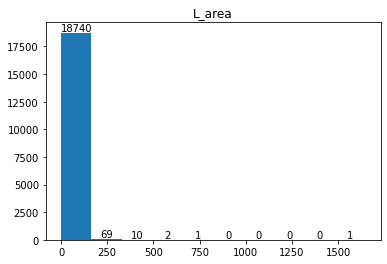

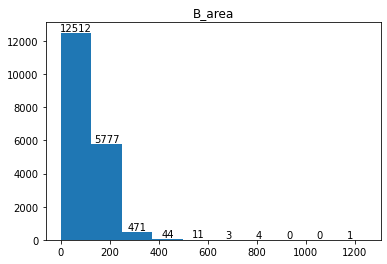

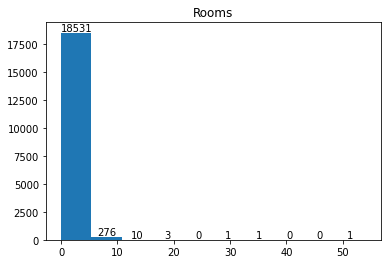

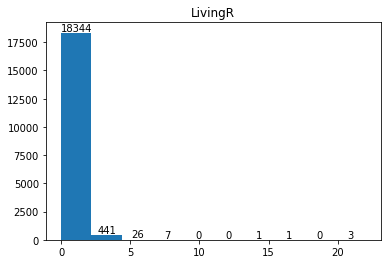

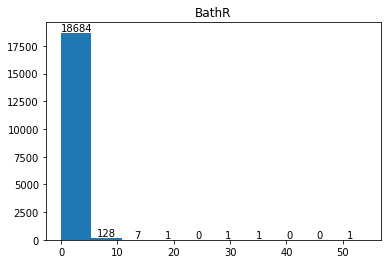

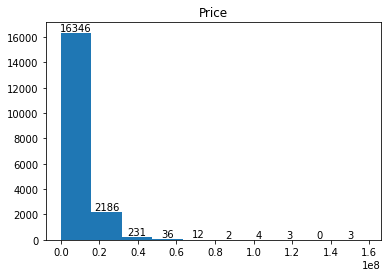

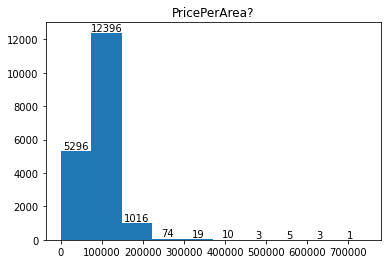

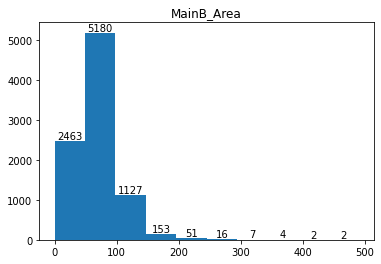

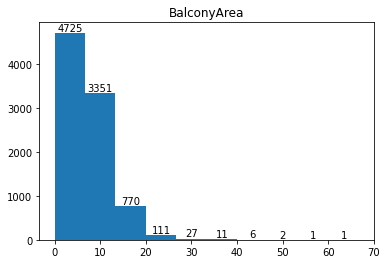

In [54]:
import matplotlib.pyplot as plt

for i in df9_num.columns:
    counts, edges, bars = plt.hist(df9_num[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [55]:
import numpy as np

def remove_ppa_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('District'):
        m = np.mean(subdf['PricePerArea?'])
        st = np.std(subdf['PricePerArea?'])
        reduced_df = subdf[(subdf['PricePerArea?']>(m-st)) & (subdf['PricePerArea?']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [56]:
df9.shape

(18823, 13)

In [57]:
df_test1 = remove_ppa_outliers(df9)
df_test1.shape

(14602, 13)

In [58]:
# look at numeric and categorical values separately 
df_test1_num = df_test1[['L_area','B_area','Rooms','LivingR','BathR','Price','PricePerArea?','MainB_Area','BalconyArea']]
df_test1_cat = df_test1[['District','PropertyType','MainMaterial','Management']]

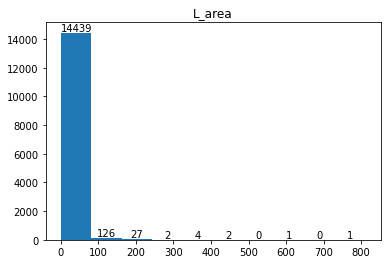

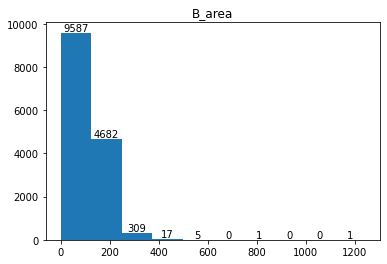

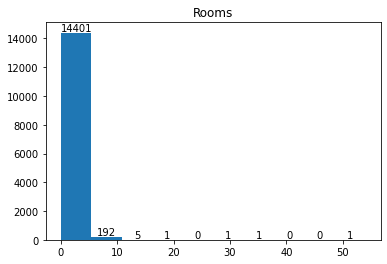

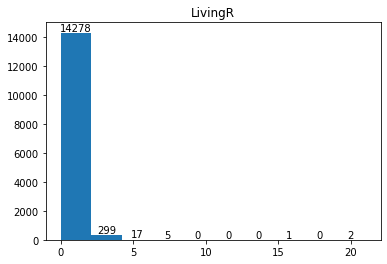

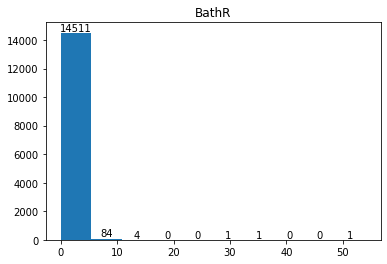

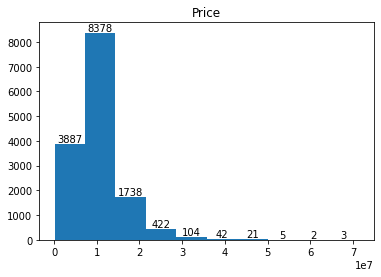

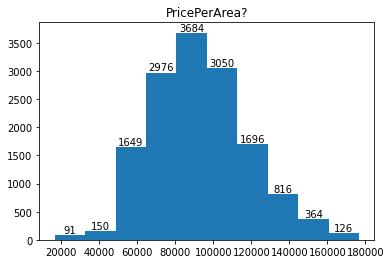

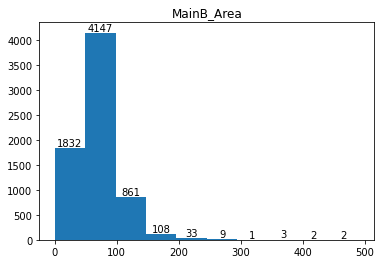

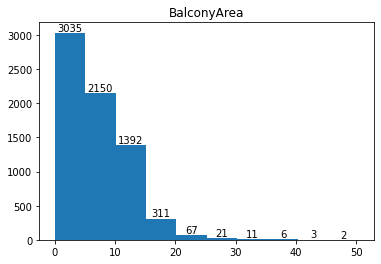

In [59]:
import matplotlib.pyplot as plt

for i in df_test1_num.columns:
    counts, edges, bars = plt.hist(df_test1_num[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [60]:
df10 = df_test1.copy()

In [63]:
df10.shape

(14602, 13)

In [64]:
df11 = df10[df10['Rooms']<15]

In [65]:
df12 = df11[df11['LivingR'] < 15]

In [66]:
df12[df12['LivingR'] > 5]

,District,L_area,PropertyType,MainMaterial,B_area,Rooms,LivingR,BathR,Management,Price,PricePerArea?,MainB_Area,BalconyArea
3463,土城區,31.64,公寓,鋼筋混凝土造,110.21,7.0,7.0,6.0,0,9800000.0,88921.0,NaN,NaN
7134,板橋區,34.25,公寓,鋼筋混凝土造,72.65,8.0,8.0,8.0,0,8450000.0,116311.0,NaN,NaN
7368,板橋區,72.91,華廈,鋼筋混凝土造,398.24,9.0,6.0,3.0,0,58000000.0,145641.0,NaN,NaN
7648,板橋區,157.00,透天厝,鋼筋混凝土造,349.96,10.0,8.0,4.0,0,37000000.0,105726.0,NaN,NaN
8394,板橋區,17.40,公寓,鋼筋混凝土造,63.00,6.0,6.0,6.0,0,8100000.0,128571.0,63.0,0.0
8906,樹林區,26.19,公寓,鋼筋混凝土造,100.85,7.0,7.0,7.0,0,9300000.0,92216.0,NaN,NaN
9516,永和區,36.08,華廈,鋼筋混凝土造,144.23,7.0,7.0,7.0,1,18000000.0,124801.0,NaN,NaN


c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23805 (\N{CJK UNIFIED IDEOGRAPH-5CFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33437 (\N{CJK UNIFIED IDEOGRAPH-829D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\sit

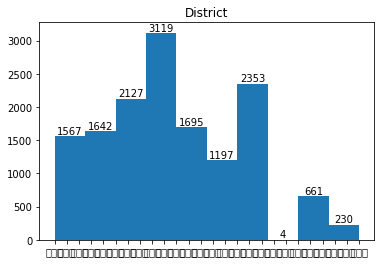

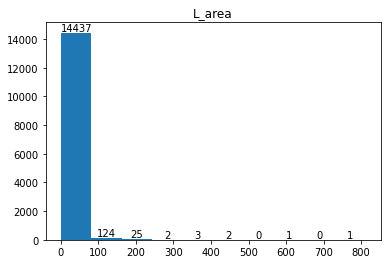

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\sit

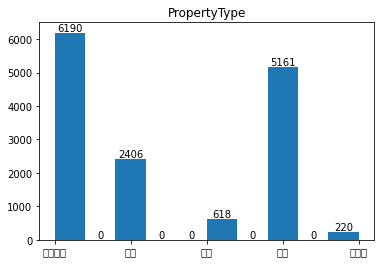

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37628 (\N{CJK UNIFIED IDEOGRAPH-92FC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31563 (\N{CJK UNIFIED IDEOGRAPH-7B4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20957 (\N{CJK UNIFIED IDEOGRAPH-51DD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\sit

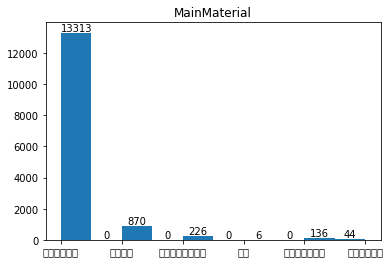

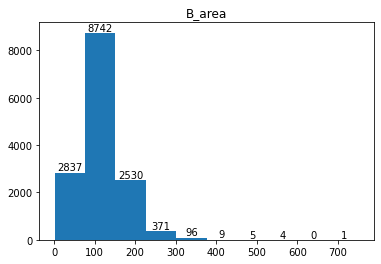

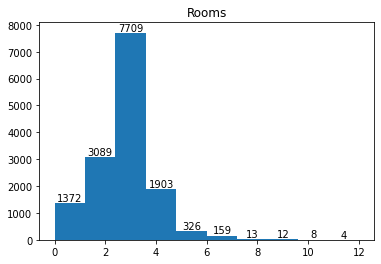

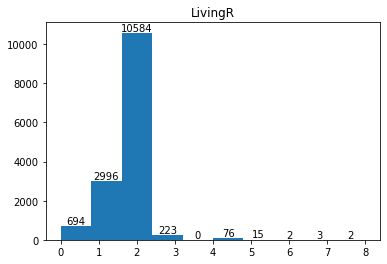

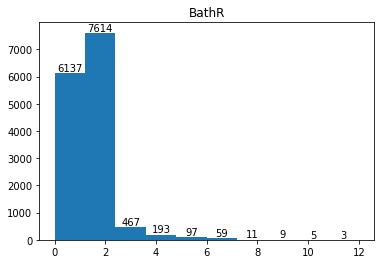

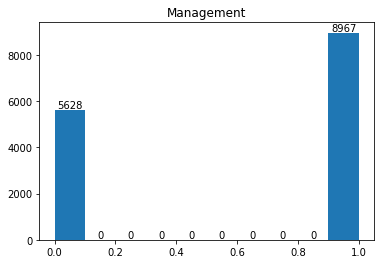

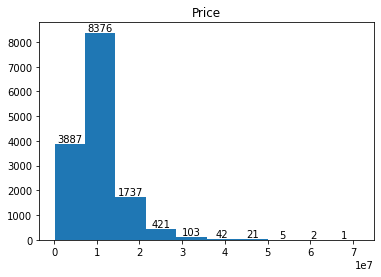

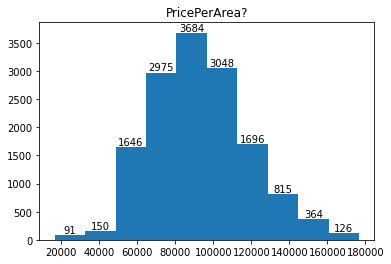

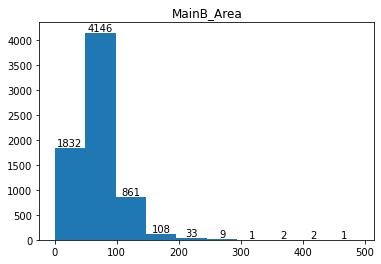

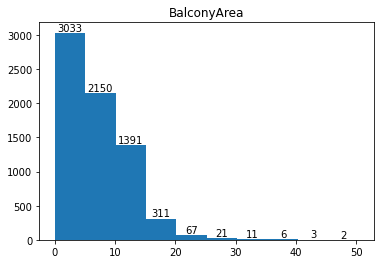

In [67]:
for i in df12.columns:
    counts, edges, bars = plt.hist(df12[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [68]:
df13 = df12[df12['Price']<50000000]

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23805 (\N{CJK UNIFIED IDEOGRAPH-5CFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33437 (\N{CJK UNIFIED IDEOGRAPH-829D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\sit

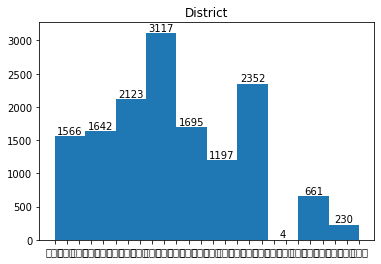

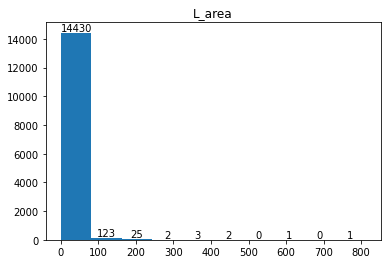

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\sit

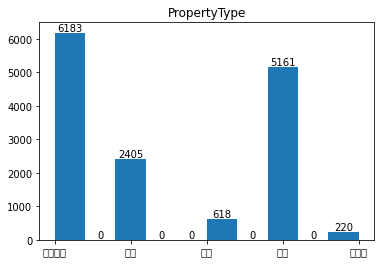

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37628 (\N{CJK UNIFIED IDEOGRAPH-92FC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31563 (\N{CJK UNIFIED IDEOGRAPH-7B4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20957 (\N{CJK UNIFIED IDEOGRAPH-51DD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\sit

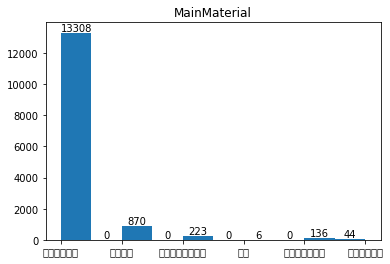

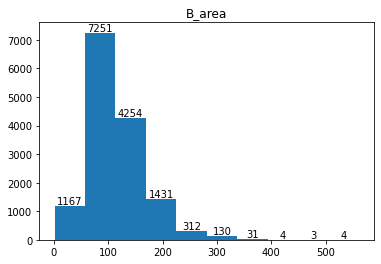

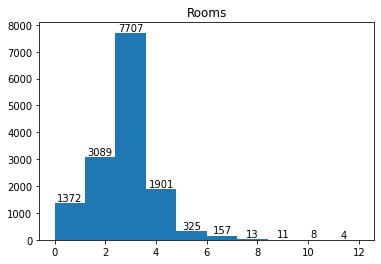

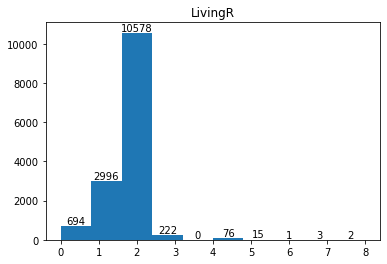

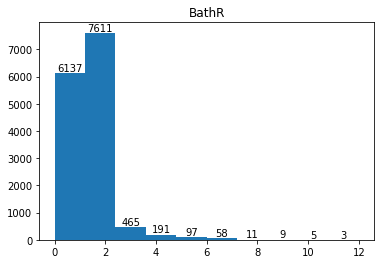

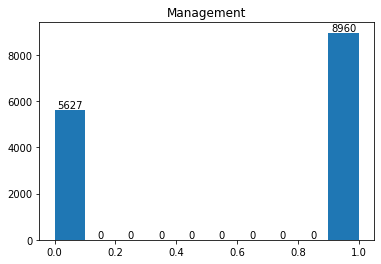

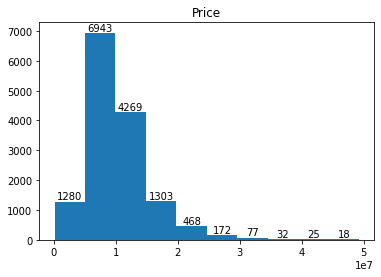

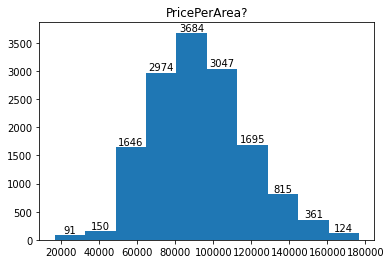

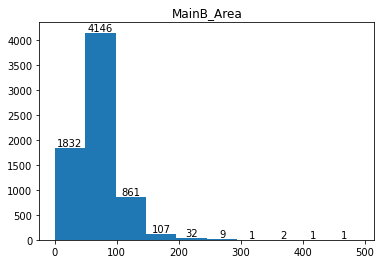

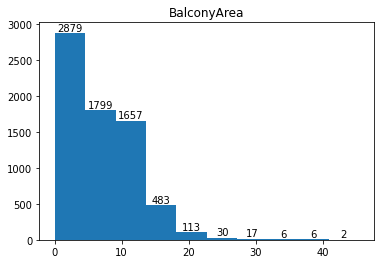

In [69]:
for i in df13.columns:
    counts, edges, bars = plt.hist(df13[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [70]:
import warnings
warnings.filterwarnings('ignore')

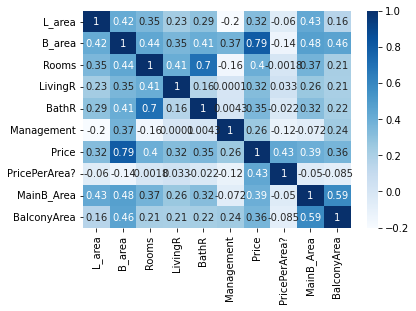

In [71]:
import seaborn as sns


sns.heatmap(df13.corr(),annot=True, cmap="Blues")
plt.show()

In [72]:
df9.shape

(18823, 13)

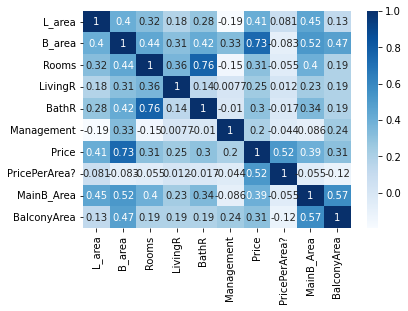

In [73]:
sns.heatmap(df9.corr(),annot=True, cmap="Blues")
plt.show()

In [74]:
cols_to_del_3 = ['Management','PricePerArea?','MainB_Area','BalconyArea','L_area']

In [75]:
df10 = df9.copy()

In [76]:
df10 = df10.drop(columns=cols_to_del_3)

In [77]:
df10.head()

,District,PropertyType,MainMaterial,B_area,Rooms,LivingR,BathR,Price
0,板橋區,住宅大樓,鋼筋混凝土造,134.37,3.0,2.0,2.0,14600000.0
2,板橋區,住宅大樓,鋼筋混凝土造,155.63,2.0,2.0,2.0,19500000.0
3,板橋區,公寓,鋼筋混凝土造,58.70,0.0,0.0,0.0,23500000.0
4,板橋區,公寓,鋼筋混凝土造,90.21,5.0,0.0,5.0,10050000.0
5,板橋區,套房,鋼骨鋼筋混凝土造,37.89,0.0,0.0,0.0,5000000.0


In [78]:
df10['Price/B_area'] = df10['Price']/df10['B_area']

In [79]:
df10.head()

,District,PropertyType,MainMaterial,B_area,Rooms,LivingR,BathR,Price,Price/B_area
0,板橋區,住宅大樓,鋼筋混凝土造,134.37,3.0,2.0,2.0,14600000.0,108655.205775
2,板橋區,住宅大樓,鋼筋混凝土造,155.63,2.0,2.0,2.0,19500000.0,125297.179207
3,板橋區,公寓,鋼筋混凝土造,58.70,0.0,0.0,0.0,23500000.0,400340.715503
4,板橋區,公寓,鋼筋混凝土造,90.21,5.0,0.0,5.0,10050000.0,111406.717659
5,板橋區,套房,鋼骨鋼筋混凝土造,37.89,0.0,0.0,0.0,5000000.0,131960.939562


In [80]:
def remove_ppa_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('District'):
        m = np.mean(subdf['Price/B_area'])
        st = np.std(subdf['Price/B_area'])
        reduced_df = subdf[(subdf['Price/B_area']>(m-st)) & (subdf['Price/B_area']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [81]:
df10.shape

(18823, 9)

In [82]:
df_test = remove_ppa_outliers(df10)

In [83]:
df_test.shape

(14662, 9)

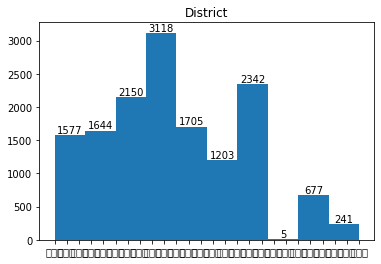

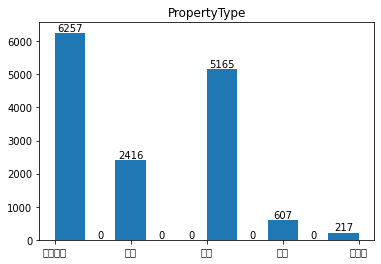

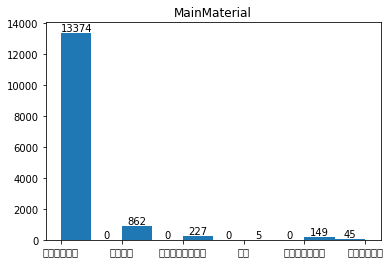

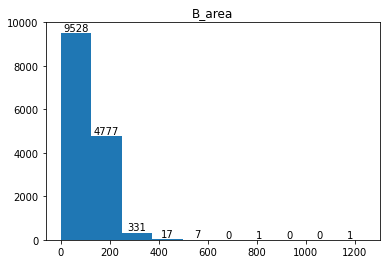

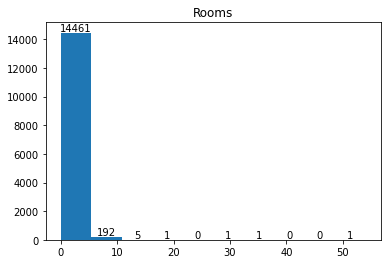

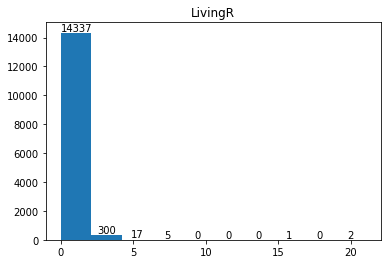

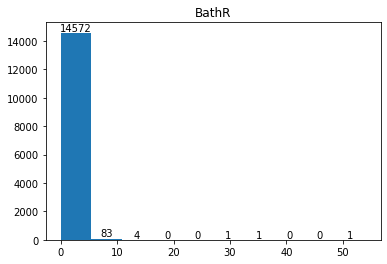

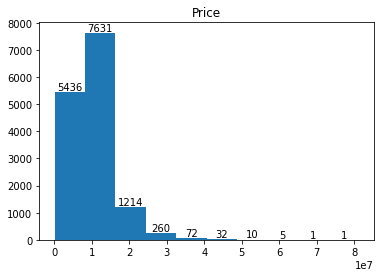

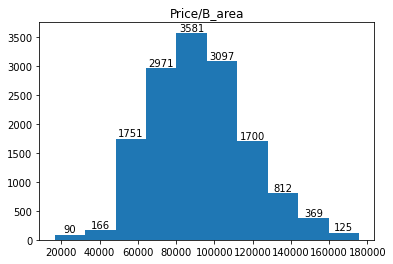

In [84]:
for i in df_test.columns:
    counts, edges, bars = plt.hist(df_test[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [85]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('District'):
        m = np.mean(subdf['Price'])
        st = np.std(subdf['Price'])
        reduced_df = subdf[(subdf['Price']>(m-st)) & (subdf['Price']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [86]:
df_test = remove_price_outliers(df10)

In [87]:
df_test.shape

(15323, 9)

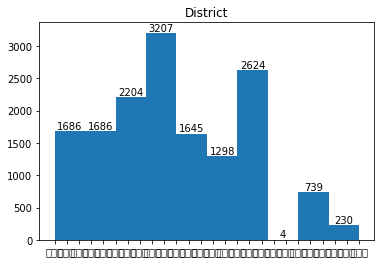

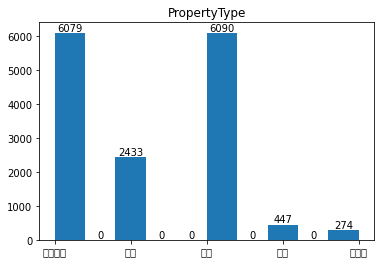

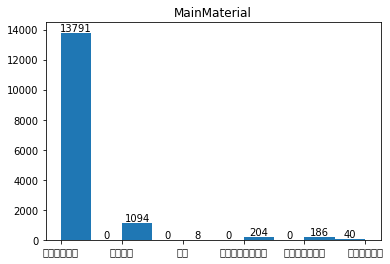

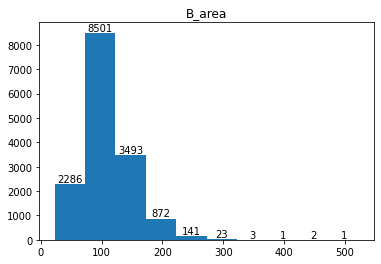

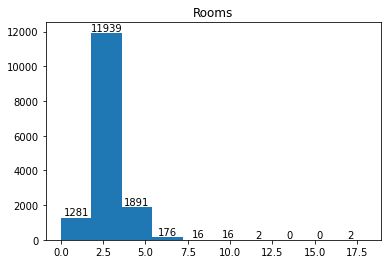

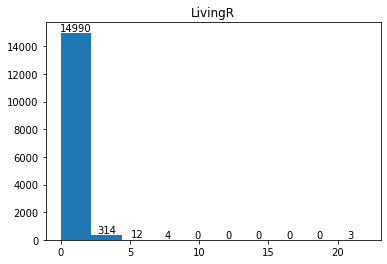

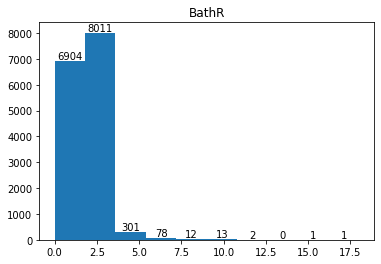

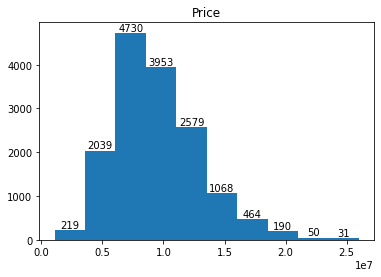

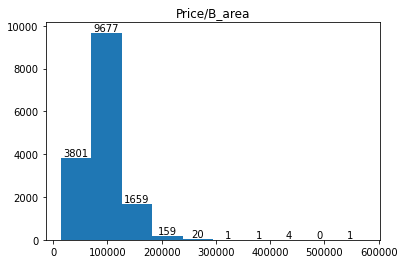

In [88]:
for i in df_test.columns:
    counts, edges, bars = plt.hist(df_test[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [89]:
df11 = df_test.copy()

In [90]:
df11 = df11.drop(['Price/B_area'],1)

In [91]:
df11 = df11[df11['Rooms']<15]

In [92]:
df12 = df11[df11['LivingR'] < 10]

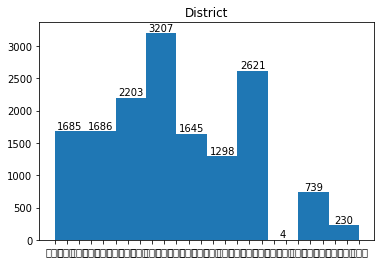

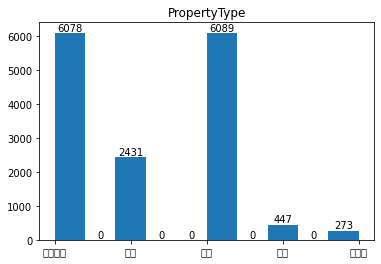

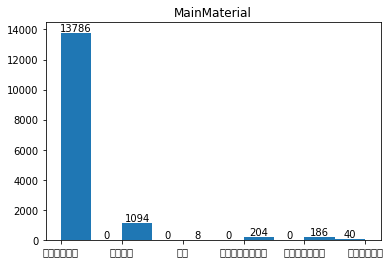

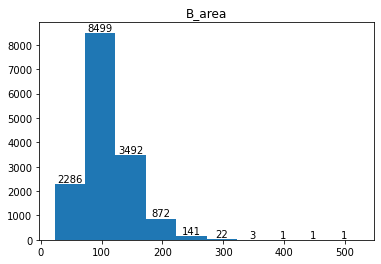

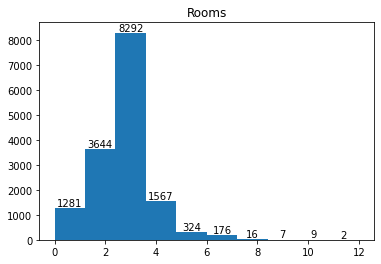

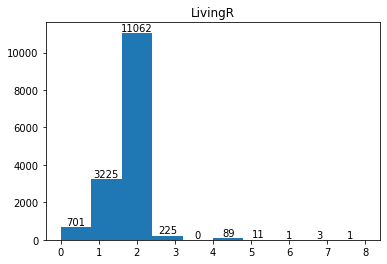

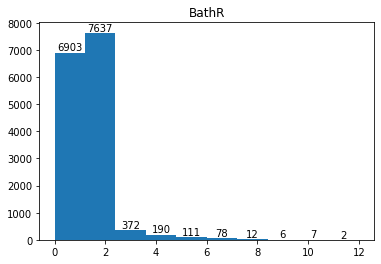

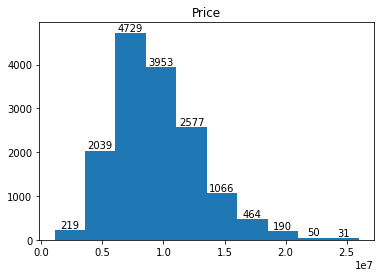

In [93]:
for i in df12.columns:
    counts, edges, bars = plt.hist(df12[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [94]:
df12.to_csv('新北_houseprediction.csv')

In [95]:
df12.columns

Index(['District', 'PropertyType', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Price'],
      dtype='object')

In [96]:
df12[['District','PropertyType','MainMaterial']]

,District,PropertyType,MainMaterial
0,三峽區,住宅大樓,鋼筋混凝土造
1,三峽區,住宅大樓,鋼筋混凝土造
2,三峽區,華廈,鋼筋混凝土造
3,三峽區,華廈,鋼筋混凝土造
4,三峽區,華廈,鋼筋混凝土造
...,...,...,...
15318,鶯歌區,華廈,鋼筋混凝土造
15319,鶯歌區,公寓,鋼筋混凝土造
15320,鶯歌區,住宅大樓,鋼筋混凝土造
15321,鶯歌區,住宅大樓,鋼筋混凝土造


In [97]:
dummies_District = pd.get_dummies(df12.District)

In [98]:
dummies_PropertyType = pd.get_dummies(df12.PropertyType)
dummies_MainMaterial = pd.get_dummies(df12.MainMaterial)

In [99]:
dummies = pd.concat([dummies_District, dummies_PropertyType,dummies_MainMaterial],axis=1)

In [100]:
#df13 = pd.concat([df12,dummies],axis='columns')

In [101]:
#df.drop(['C', 'D'], axis = 1)

In [102]:
df13 = pd.concat([df12.drop(['District','PropertyType','MainMaterial'],axis =1),dummies],axis='columns')

In [103]:
df14 = pd.concat([df12.drop(['District','PropertyType','MainMaterial'],axis =1),dummies_District ],axis='columns')

In [104]:
df15 = pd.get_dummies(df12)

In [105]:
df15.head()

,B_area,Rooms,LivingR,BathR,Price,District_三峽區,District_三芝區,District_三重區,District_中和區,District_五股區,...,PropertyType_公寓,PropertyType_套房,PropertyType_華廈,PropertyType_透天厝,MainMaterial_加強磚造,MainMaterial_磚造,MainMaterial_見其他登記事項,MainMaterial_鋼筋混凝土造,MainMaterial_鋼骨混凝土造,MainMaterial_鋼骨鋼筋混凝土造
0,135.30,3.0,2.0,2.0,10500000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,164.51,4.0,2.0,2.0,13000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,85.32,2.0,2.0,1.0,5400000.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,153.79,4.0,2.0,2.0,8800000.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,139.83,4.0,2.0,2.0,8700000.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


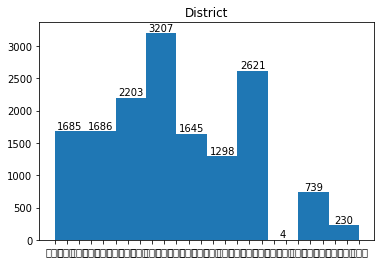

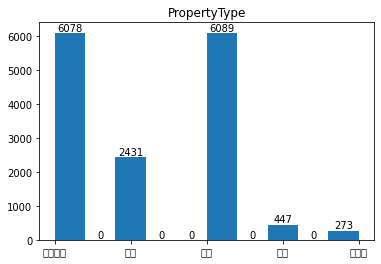

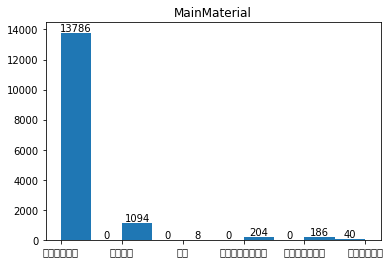

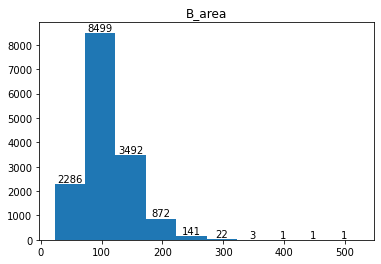

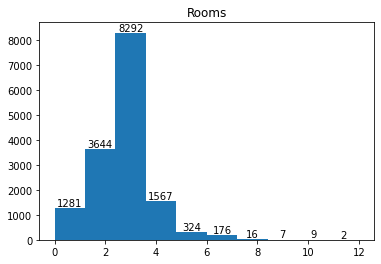

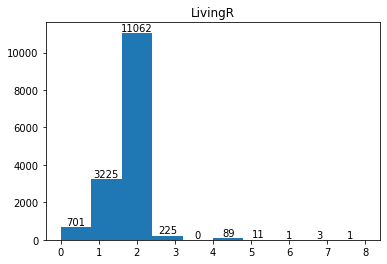

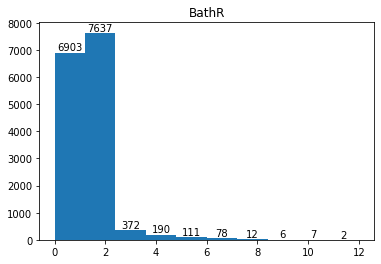

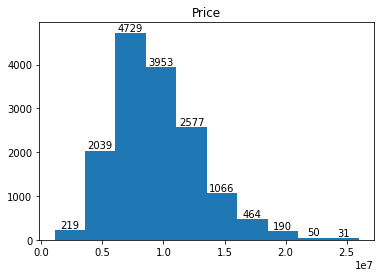

In [106]:
for i in df12.columns:
    counts, edges, bars = plt.hist(df12[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [107]:
df13.columns

Index(['B_area', 'Rooms', 'LivingR', 'BathR', 'Price', '三峽區', '三芝區', '三重區',
       '中和區', '五股區', '八里區', '土城區', '新店區', '新莊區', '板橋區', '林口區', '樹林區', '永和區',
       '汐止區', '泰山區', '淡水區', '深坑區', '瑞芳區', '石碇區', '石門區', '萬里區', '蘆洲區', '貢寮區',
       '金山區', '雙溪區', '鶯歌區', '住宅大樓', '公寓', '套房', '華廈', '透天厝', '加強磚造', '磚造',
       '見其他登記事項', '鋼筋混凝土造', '鋼骨混凝土造', '鋼骨鋼筋混凝土造'],
      dtype='object')

In [108]:
df16 = df13.copy()

In [109]:
df16 = df16[~((df16['Rooms']>8) | (df16['BathR']>8)  )]

In [110]:
df17 = df13.copy()

In [111]:
df17['Price'] = np.log(df17['Price'])
df17['B_area'] = np.log(df17['B_area'])

In [112]:
df17.columns

Index(['B_area', 'Rooms', 'LivingR', 'BathR', 'Price', '三峽區', '三芝區', '三重區',
       '中和區', '五股區', '八里區', '土城區', '新店區', '新莊區', '板橋區', '林口區', '樹林區', '永和區',
       '汐止區', '泰山區', '淡水區', '深坑區', '瑞芳區', '石碇區', '石門區', '萬里區', '蘆洲區', '貢寮區',
       '金山區', '雙溪區', '鶯歌區', '住宅大樓', '公寓', '套房', '華廈', '透天厝', '加強磚造', '磚造',
       '見其他登記事項', '鋼筋混凝土造', '鋼骨混凝土造', '鋼骨鋼筋混凝土造'],
      dtype='object')

In [113]:
df17['Rooms'] = np.log(df17['Rooms']+1)
df17['LivingR'] = np.log(df17['LivingR']+1)
df17['BathR'] = np.log(df17['BathR']+1)

In [114]:
#df17 = df17.drop(columns=['Rooms','LivingR','BathR'])

In [115]:
df17.columns

Index(['B_area', 'Rooms', 'LivingR', 'BathR', 'Price', '三峽區', '三芝區', '三重區',
       '中和區', '五股區', '八里區', '土城區', '新店區', '新莊區', '板橋區', '林口區', '樹林區', '永和區',
       '汐止區', '泰山區', '淡水區', '深坑區', '瑞芳區', '石碇區', '石門區', '萬里區', '蘆洲區', '貢寮區',
       '金山區', '雙溪區', '鶯歌區', '住宅大樓', '公寓', '套房', '華廈', '透天厝', '加強磚造', '磚造',
       '見其他登記事項', '鋼筋混凝土造', '鋼骨混凝土造', '鋼骨鋼筋混凝土造'],
      dtype='object')

In [116]:
df_train = df17

In [117]:
X = df_train.drop(['Price'],axis='columns')
X.head(3)

,B_area,Rooms,LivingR,BathR,三峽區,三芝區,三重區,中和區,五股區,八里區,...,公寓,套房,華廈,透天厝,加強磚造,磚造,見其他登記事項,鋼筋混凝土造,鋼骨混凝土造,鋼骨鋼筋混凝土造
0,4.907495,1.386294,1.098612,1.098612,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.102971,1.609438,1.098612,1.098612,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4.446409,1.098612,1.098612,0.693147,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [118]:
y = df_train.Price
y.head(3)

0    16.166886
1    16.380460
2    15.501910
Name: Price, dtype: float64

In [119]:
X.shape

(15318, 41)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [121]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7001560204947324

In [122]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 7.00156020e-01,  7.18674374e-01,  7.14394312e-01,  7.08403871e-01,
       -1.26824631e+18])

In [123]:
df_train.columns

Index(['B_area', 'Rooms', 'LivingR', 'BathR', 'Price', '三峽區', '三芝區', '三重區',
       '中和區', '五股區', '八里區', '土城區', '新店區', '新莊區', '板橋區', '林口區', '樹林區', '永和區',
       '汐止區', '泰山區', '淡水區', '深坑區', '瑞芳區', '石碇區', '石門區', '萬里區', '蘆洲區', '貢寮區',
       '金山區', '雙溪區', '鶯歌區', '住宅大樓', '公寓', '套房', '華廈', '透天厝', '加強磚造', '磚造',
       '見其他登記事項', '鋼筋混凝土造', '鋼骨混凝土造', '鋼骨鋼筋混凝土造'],
      dtype='object')

In [124]:
df_train.head()

,B_area,Rooms,LivingR,BathR,Price,三峽區,三芝區,三重區,中和區,五股區,...,公寓,套房,華廈,透天厝,加強磚造,磚造,見其他登記事項,鋼筋混凝土造,鋼骨混凝土造,鋼骨鋼筋混凝土造
0,4.907495,1.386294,1.098612,1.098612,16.166886,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.102971,1.609438,1.098612,1.098612,16.380460,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4.446409,1.098612,1.098612,0.693147,15.501910,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,5.035588,1.609438,1.098612,1.098612,15.990262,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,4.940427,1.609438,1.098612,1.098612,15.978834,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [125]:
def predict_price(district,properties,material,Barea,rooms,livingR,bath):    
    loc_index = np.where(X.columns==district)[0][0]
    property_index = np.where(X.columns==properties)[0][0]
    material_index = np.where(X.columns==material)[0][0]
    

    x = np.zeros(len(X.columns))
    x[0] = Barea
    x[1] = rooms
    x[2] = livingR
    x[3] = bath
    if loc_index >= 0:
        x[loc_index] = 1
    if property_index >= 0:
        x[property_index] = 1
    if material_index >= 0:
        x[material_index] = 1

    return lr_clf.predict([x])[0]

In [126]:
predict_price('三峽區','華廈','磚造',150,1,1,1)

117.6015625

In [127]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [128]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [129]:
columns_list = list(columns.values())[0]

In [130]:
'''for i,v in enumerate(columns_list):
    print(i)
    print(v)'''

'for i,v in enumerate(columns_list):\n    print(i)\n    print(v)'